<a href="https://colab.research.google.com/github/karnali/colab/blob/master/coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [2]:
!wget -c 'https://docs.google.com/spreadsheets/d/1wQVypefm946ch4XDp37uZ-wartW4V7ILdg-qYiDXUHM/export?format=csv&gid?usp=sharing' -O 2019_nCoV_data.csv
!mkdir /content/2019_nCoV_data/
!mv 2019_nCoV_data.csv /content/2019_nCoV_data/
!pwd
!ls -l


--2020-02-08 14:40:03--  https://docs.google.com/spreadsheets/d/1wQVypefm946ch4XDp37uZ-wartW4V7ILdg-qYiDXUHM/export?format=csv&gid?usp=sharing
Resolving docs.google.com (docs.google.com)... 173.194.217.113, 173.194.217.102, 173.194.217.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.217.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘2019_nCoV_data.csv’

2019_nCoV_data.csv      [ <=>                ]   2.80K  --.-KB/s    in 0s      

2020-02-08 14:40:03 (38.5 MB/s) - ‘2019_nCoV_data.csv’ saved [2866]

mkdir: cannot create directory ‘/content/2019_nCoV_data/’: File exists
/content
total 8
drwxr-xr-x 2 root root 4096 Feb  8 14:40 2019_nCoV_data
drwxr-xr-x 1 root root 4096 Feb  5 18:37 sample_data


In [3]:
# Reading the dataset
df = pd.read_csv("../content/2019_nCoV_data/2019_nCoV_data.csv")
df.head(80)


,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,2/7/20 14:03,22112,618,867
1,Guangdong,Mainland China,2/7/20 10:13,1034,1,88
2,Zhejiang,Mainland China,2/7/20 11:33,1006,0,123
3,Henan,Mainland China,2/7/20 14:03,914,3,86
4,Hunan,Mainland China,2/7/20 11:33,772,0,112
...,...,...,...,...,...,...
67,"Los Angeles, CA",US,2/1/20 19:53,1,0,0
68,"Madison, WI",US,2/5/20 21:53,1,0,0
69,"Orange, CA",US,2/1/20 19:53,1,0,0
70,"Seattle, WA",US,2/1/20 19:43,1,0,0


In [4]:
# Let's look at the various columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
Province/State    51 non-null object
Country/Region    72 non-null object
Last Update       72 non-null object
Confirmed         72 non-null int64
Deaths            72 non-null int64
Recovered         72 non-null int64
dtypes: int64(3), object(3)
memory usage: 3.5+ KB


In [5]:
df.describe()

,Confirmed,Deaths,Recovered
count,72.000000,72.000000,72.000000
mean,437.944444,8.861111,24.486111
std,2601.737544,72.801738,103.858923
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,17.000000,0.000000,1.000000
75%,146.500000,0.000000,12.750000
max,22112.000000,618.000000,867.000000


In [6]:
# Countries affected
countries = df['Country/Region'].unique().tolist()
print(countries)

print("\nTotal countries affected by virus: ",len(countries))

['Mainland China', 'Others', 'Singapore', 'Hong Kong', 'Japan', 'Thailand', 'South Korea', 'Taiwan', 'Germany', 'Malaysia', 'Macau', 'Vietnam', 'France', 'Australia', 'United Arab Emirates', 'Canada', 'India', 'Italy', 'Philippines', 'UK', 'Russia', 'US', 'Belgium', 'Cambodia', 'Finland', 'Nepal', 'Spain', 'Sri Lanka', 'Sweden']

Total countries affected by virus:  29


In [7]:
#Combining China and Mainland China cases
df['Country/Region'].replace({'Mainland China':'China'},inplace=True)
countries = df['Country/Region'].unique().tolist()
print(countries)
print("\nTotal countries affected by virus: ",len(countries))



['China', 'Others', 'Singapore', 'Hong Kong', 'Japan', 'Thailand', 'South Korea', 'Taiwan', 'Germany', 'Malaysia', 'Macau', 'Vietnam', 'France', 'Australia', 'United Arab Emirates', 'Canada', 'India', 'Italy', 'Philippines', 'UK', 'Russia', 'US', 'Belgium', 'Cambodia', 'Finland', 'Nepal', 'Spain', 'Sri Lanka', 'Sweden']

Total countries affected by virus:  29


In [8]:
# Creating a dataframe with total no of confirmed cases for every Country/Region
Number_of_countries = len(df['Country/Region'].value_counts())

cases = pd.DataFrame(df.groupby('Country/Region')['Confirmed','Deaths'].sum())
cases['Country/Region'] = cases.index

global_cases = cases[['Confirmed','Deaths']]
global_cases.sort_values(['Confirmed'], ascending=False)


,Confirmed,Deaths
Country/Region,,
China,31215,636
Others,61,0
Singapore,30,0
Thailand,25,0
Hong Kong,25,1
Japan,25,0
South Korea,24,0
Taiwan,16,0
Australia,15,0


Text(0.5, 1, 'Deaths By Corona Virus')

<Figure size 1080x1440 with 0 Axes>

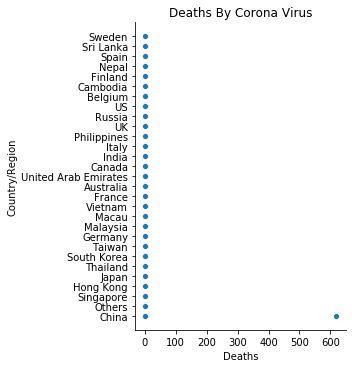

In [9]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(15,20))
sns.relplot(x="Deaths", y="Country/Region", data=df)
# plt.xlim(0,700)
plt.title('Deaths By Corona Virus')